<a href="https://colab.research.google.com/github/dmklee/nuro-arm/blob/main/nuro-arm-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone and install github repo


In [9]:
!git clone https://github.com/dmklee/nuro-arm.git
!pip install nuro-arm/

fatal: destination path 'nuro-arm' already exists and is not an empty directory.
Processing ./nuro-arm
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for nuro-arm: filename=nuro_arm-0.0.1-py3-none-any.whl size=3862524 sha256=0aa30bfdab720710e59a14033f5606b23223b10365b58beeb04d6185bb6b2224
  Stored in directory: /root/.cache/pip/wheels/10/03/f4/741a634e94648d97b14be760853bd353ef7beb7f96ccbb8578
Successfully built nuro-arm
  Attempting uninstall: nuro-arm
    Found existing installation: nuro-arm 0.0.1
    Uninstalling nuro-arm-0.0.1:
      Successfully uninstalled nuro-arm-0.0.1


### Helper functions for visualization

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

def show_video(video):
  fig = plt.figure()
  im = plt.imshow(video[0])
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.close()

  def animate(i):
    im.set_data(video[i])

  anim = animation.FuncAnimation(fig, animate, frames=len(video), interval=50)
  return HTML(anim.to_html5_video())

def show_image(image):
  fig = plt.figure()
  im = plt.imshow(image)
  plt.axis('off')
  plt.tight_layout(pad=0)

# pose matrix for camera that looks upon scene from side
side_view_pose_mtx = np.array([[-0.866, 0.3214,-0.3830, 0.3264],
                               [-0.5, -0.5567, 0.663, -0.351],
                               [-0, -0.766, -0.6428, 0.514],
                               [0, 0, 0, 1]])

# Create simulated robot

In [47]:
from nuro_arm import RobotArm, Camera, Cube

robot = RobotArm('sim', realtime=True)
side_view_camera = Camera('sim', pose_mtx=side_view_pose_mtx)
camera = Camera('sim')

cube = Cube(pos=[0.2, 0, 0.0125], tag_id=0)


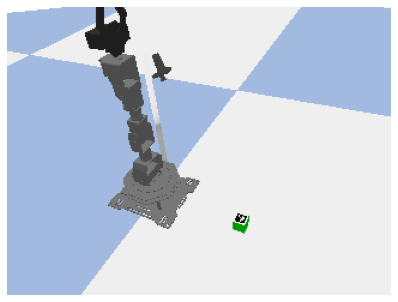

In [39]:
# visualize the scene
image = side_view_camera.get_image()
show_image(image)

Detection position error : 0.010
[ 0.20674215 -0.00607652  0.00890674]
(0.20000016283340763, 4.198144232602786e-06, 0.012407905777402271)


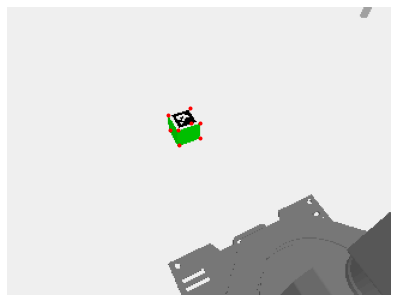

In [44]:
# detect cube with aruco tag
detected_cube = camera.find_cubes(tag_size=0.0254*0.75)[0]

# show image with cube vertices highlighted
image = camera.get_image()
show_image(image)
pixel_vertices = camera.project_world_points(detected_cube.vertices)
for v in pixel_vertices:
  plt.plot(*v, 'r.')

In [45]:
# picking up the cube
side_view_camera.start_recording(1)

robot.open_gripper()
robot.move_hand_to( detected_cube.pos )
# robot.move_hand_to( cube.get_position() )
robot.close_gripper()
robot.home()

video = side_view_camera.wait_for_recording()

In [46]:
show_video(video)